In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:

!pip install -U textblob


In [2]:
!pip install wordcloud

In [3]:
!pip install -U pip setuptools wheel
!pip install -U spacy

     ---------------------------------------- 1.2/1.2 MB 5.2 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 62.3.4
    Uninstalling setuptools-62.3.4:
      Successfully uninstalled setuptools-62.3.4


In [4]:
# Import libraries
import pandas as pd
from textblob import TextBlob
from pandas.io.json import json_normalize
from wordcloud import WordCloud
import math
import re
import json
import numpy as np
from nltk.stem import WordNetLemmatizer
import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
import spacy
from nltk.corpus import sentiwordnet as swn
from IPython.display import clear_output
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import plotly
plotly.offline.init_notebook_mode (connected = True)

In [5]:
data2=pd.read_csv('C:/Users/Pooja/Downloads/Source code/Source code/Source code/DB/filename.csv')
data2

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1.530020e+18,1.530020e+18,2022-05-27 02:48:20 UTC,27-05-2022,02:48:20,0,1.445090e+18,alegnacesho,alegna cesho journalist,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,1.530020e+18,1.529890e+18,2022-05-27 02:48:19 UTC,27-05-2022,02:48:19,0,1.257410e+18,realwar89104016,Real Warrior,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'HaydenHall5', 'name': 'Hayde...",NaN,NaN,NaN,NaN
2,1.530020e+18,1.530020e+18,2022-05-27 02:48:17 UTC,27-05-2022,02:48:17,0,4.417161e+07,tracette761,Tracette,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,1.530020e+18,1.529980e+18,2022-05-27 02:48:17 UTC,27-05-2022,02:48:17,0,1.225870e+18,roberts46194573,robertstrauss,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'Prez215', 'name': 'P-R-E-Z -...",NaN,NaN,NaN,NaN
4,1.530020e+18,1.530020e+18,2022-05-27 02:48:17 UTC,27-05-2022,02:48:17,0,1.478180e+18,manoharsnegi,M.S.Negi,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'AEHarshada', 'name': 'Harsha...",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10011,1.529960e+18,1.529960e+18,2022-05-26 23:04:02 UTC,26-05-2022,23:04:02,0,4.746627e+08,matheusfj100,Matheus Ferreira,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
10012,1.529960e+18,1.529960e+18,2022-05-26 23:04:00 UTC,26-05-2022,23:04:00,0,1.526160e+18,ukrainenowmedia,Ukraine Now Media,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
10013,1.529960e+18,1.529490e+18,2022-05-26 23:03:59 UTC,26-05-2022,23:03:59,0,1.422620e+18,eetuseppnen1,Eetu Seppänen,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'SalOrtega12', 'name': 'sal',...",NaN,NaN,NaN,NaN
10014,1.529960e+18,1.529470e+18,2022-05-26 23:03:56 UTC,26-05-2022,23:03:56,0,1.216850e+18,bobsmith666666,Bob Smith,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'GeoDrill', 'name': 'Geoff', ...",NaN,NaN,NaN,NaN


In [6]:
print('Count of columns in the dataset is:  ', len(data2.columns))
print('Count of rows in the dataset is:  ', len(data2))

Count of columns in the dataset is:   36
Count of rows in the dataset is:   10016


In [7]:
data2.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

In [8]:
data2[["tweet"]].head()

,tweet
0,*Turkish Security Council: the operations of t...
1,@HaydenHall5 Putin had a strong grip on Russia...
2,Russia expert lets mask slip as he warns milit...
3,@Prez215 America is fighting Russia by Proxy
4,@AEHarshada Mam : NMDC - check YOY result ...


In [9]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10016 entries, 0 to 10015
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               10016 non-null  float64
 1   conversation_id  10016 non-null  float64
 2   created_at       10016 non-null  object 
 3   date             10016 non-null  object 
 4   time             10016 non-null  object 
 5   timezone         10016 non-null  int64  
 6   user_id          10016 non-null  float64
 7   username         10016 non-null  object 
 8   name             10015 non-null  object 
 9   place            3 non-null      object 
 10  tweet            10016 non-null  object 
 11  language         10016 non-null  object 
 12  mentions         10016 non-null  object 
 13  urls             10016 non-null  object 
 14  photos           10016 non-null  object 
 15  replies_count    10016 non-null  int64  
 16  retweets_count   10016 non-null  int64  
 17  likes_count 

In [10]:
data2["timezone"]

0        0
1        0
2        0
3        0
4        0
        ..
10011    0
10012    0
10013    0
10014    0
10015    0
Name: timezone, Length: 10016, dtype: int64

In [11]:
data2.dtypes

id                 float64
conversation_id    float64
created_at          object
date                object
time                object
timezone             int64
user_id            float64
username            object
name                object
place               object
tweet               object
language            object
mentions            object
urls                object
photos              object
replies_count        int64
retweets_count       int64
likes_count          int64
hashtags            object
cashtags            object
link                object
retweet               bool
quote_url           object
video                int64
thumbnail           object
near               float64
geo                float64
source             float64
user_rt_id         float64
user_rt            float64
retweet_id         float64
reply_to            object
retweet_date       float64
translate          float64
trans_src          float64
trans_dest         float64
dtype: object

In [12]:
data2.isnull().sum()

id                     0
conversation_id        0
created_at             0
date                   0
time                   0
timezone               0
user_id                0
username               0
name                   1
place              10013
tweet                  0
language               0
mentions               0
urls                   0
photos                 0
replies_count          0
retweets_count         0
likes_count            0
hashtags               0
cashtags               0
link                   0
retweet                0
quote_url           9286
video                  0
thumbnail           9040
near               10016
geo                10016
source             10016
user_rt_id         10016
user_rt            10016
retweet_id         10016
reply_to               0
retweet_date       10016
translate          10016
trans_src          10016
trans_dest         10016
dtype: int64

In [13]:
data2["place"]

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
10011    NaN
10012    NaN
10013    NaN
10014    NaN
10015    NaN
Name: place, Length: 10016, dtype: object

In [14]:
# np.sum(data2.isnull().any(axis=1))
data2 = data2.dropna(axis=1) 

In [15]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10016 entries, 0 to 10015
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               10016 non-null  float64
 1   conversation_id  10016 non-null  float64
 2   created_at       10016 non-null  object 
 3   date             10016 non-null  object 
 4   time             10016 non-null  object 
 5   timezone         10016 non-null  int64  
 6   user_id          10016 non-null  float64
 7   username         10016 non-null  object 
 8   tweet            10016 non-null  object 
 9   language         10016 non-null  object 
 10  mentions         10016 non-null  object 
 11  urls             10016 non-null  object 
 12  photos           10016 non-null  object 
 13  replies_count    10016 non-null  int64  
 14  retweets_count   10016 non-null  int64  
 15  likes_count      10016 non-null  int64  
 16  hashtags         10016 non-null  object 
 17  cashtags    

In [16]:
data2['created_at'] =pd.to_datetime(data2['created_at'])   
data2["date"] = pd.to_datetime(data2["date"])


<ipython-input-16-be873d646b6c>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-16-be873d646b6c>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [17]:
data2["time"]=pd.to_datetime(data2["time"])

<ipython-input-17-6c44fd70ce91>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [18]:
data2["time"]

0       2022-06-16 02:48:20
1       2022-06-16 02:48:19
2       2022-06-16 02:48:17
3       2022-06-16 02:48:17
4       2022-06-16 02:48:17
                ...        
10011   2022-06-16 23:04:02
10012   2022-06-16 23:04:00
10013   2022-06-16 23:03:59
10014   2022-06-16 23:03:56
10015   2022-06-16 23:03:56
Name: time, Length: 10016, dtype: datetime64[ns]

In [19]:
data2['date']

0       2022-05-27
1       2022-05-27
2       2022-05-27
3       2022-05-27
4       2022-05-27
           ...    
10011   2022-05-26
10012   2022-05-26
10013   2022-05-26
10014   2022-05-26
10015   2022-05-26
Name: date, Length: 10016, dtype: datetime64[ns]

In [20]:
data2['created_at']

0       2022-05-27 02:48:20+00:00
1       2022-05-27 02:48:19+00:00
2       2022-05-27 02:48:17+00:00
3       2022-05-27 02:48:17+00:00
4       2022-05-27 02:48:17+00:00
                   ...           
10011   2022-05-26 23:04:02+00:00
10012   2022-05-26 23:04:00+00:00
10013   2022-05-26 23:03:59+00:00
10014   2022-05-26 23:03:56+00:00
10015   2022-05-26 23:03:56+00:00
Name: created_at, Length: 10016, dtype: datetime64[ns, UTC]

In [21]:
data2=data2.set_index(data2["created_at"])

In [22]:
data2

,id,conversation_id,created_at,date,time,timezone,user_id,username,tweet,language,...,photos,replies_count,retweets_count,likes_count,hashtags,cashtags,link,retweet,video,reply_to
created_at,,,,,,,,,,,,,,,,,,,,,
2022-05-27 02:48:20+00:00,1.530020e+18,1.530020e+18,2022-05-27 02:48:20+00:00,2022-05-27,2022-06-16 02:48:20,0,1.445090e+18,alegnacesho,*Turkish Security Council: the operations of t...,en,...,[],0,0,0,[],[],https://twitter.com/AlegnaCesho/status/1530018...,False,0,[]
2022-05-27 02:48:19+00:00,1.530020e+18,1.529890e+18,2022-05-27 02:48:19+00:00,2022-05-27,2022-06-16 02:48:19,0,1.257410e+18,realwar89104016,@HaydenHall5 Putin had a strong grip on Russia...,en,...,[],0,0,0,[],[],https://twitter.com/RealWar89104016/status/153...,False,0,"[{'screen_name': 'HaydenHall5', 'name': 'Hayde..."
2022-05-27 02:48:17+00:00,1.530020e+18,1.530020e+18,2022-05-27 02:48:17+00:00,2022-05-27,2022-06-16 02:48:17,0,4.417161e+07,tracette761,Russia expert lets mask slip as he warns milit...,en,...,[],0,0,0,[],[],https://twitter.com/tracette761/status/1530018...,False,0,[]
2022-05-27 02:48:17+00:00,1.530020e+18,1.529980e+18,2022-05-27 02:48:17+00:00,2022-05-27,2022-06-16 02:48:17,0,1.225870e+18,roberts46194573,@Prez215 America is fighting Russia by Proxy,en,...,[],0,0,0,[],[],https://twitter.com/roberts46194573/status/153...,False,0,"[{'screen_name': 'Prez215', 'name': 'P-R-E-Z -..."
2022-05-27 02:48:17+00:00,1.530020e+18,1.530020e+18,2022-05-27 02:48:17+00:00,2022-05-27,2022-06-16 02:48:17,0,1.478180e+18,manoharsnegi,@AEHarshada Mam : NMDC - check YOY result ...,en,...,[],0,0,0,[],[],https://twitter.com/manoharsnegi/status/153001...,False,0,"[{'screen_name': 'AEHarshada', 'name': 'Harsha..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-26 23:04:02+00:00,1.529960e+18,1.529960e+18,2022-05-26 23:04:02+00:00,2022-05-26,2022-06-16 23:04:02,0,4.746627e+08,matheusfj100,Quem deveria ficar puto era a Ucrania. O avião...,pt,...,[],1,0,0,[],[],https://twitter.com/Matheusfj100/status/152996...,False,0,[]
2022-05-26 23:04:00+00:00,1.529960e+18,1.529960e+18,2022-05-26 23:04:00+00:00,2022-05-26,2022-06-16 23:04:00,0,1.526160e+18,ukrainenowmedia,"⚡️Zelensky: ""Pressure on Russia is literally a...",en,...,[],1,6,28,[],[],https://twitter.com/UkraineNowMedia/status/152...,False,0,[]
2022-05-26 23:03:59+00:00,1.529960e+18,1.529490e+18,2022-05-26 23:03:59+00:00,2022-05-26,2022-06-16 23:03:59,0,1.422620e+18,eetuseppnen1,@SalOrtega12 @Brava24822323 @NavyLookout Those...,en,...,[],0,0,0,[],[],https://twitter.com/EetuSeppnen1/status/152996...,False,0,"[{'screen_name': 'SalOrtega12', 'name': 'sal',..."


In [23]:
data2["language"].value_counts()

en     8763
pt      486
und     182
in      133
it      117
de       47
ca       40
zh       37
ru       36
hi       33
ja       32
es       28
ur       13
tl        9
fr        8
fi        7
et        7
nl        7
ar        4
tr        3
no        3
ro        3
ta        3
vi        2
cy        2
pl        2
te        2
am        2
cs        1
is        1
uk        1
bg        1
th        1
Name: language, dtype: int64

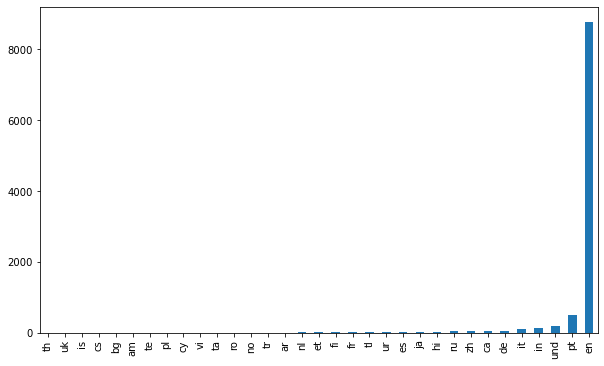

In [24]:
data2.language.value_counts().sort_values().plot(kind = 'bar',figsize=(10,6))


In [25]:
data2["tweet"][0]

'*Turkish Security Council: the operations of the Armed Forces are not directed against other countries😂*Lavrov: Russia will continue to support the restoration of the integrity of Syria *The US is trying to salvage the crisis in Syria, Lavrov said 10'

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
# function to collect hashtags
def hashtag_extract(text_list):
    hashtags = []
    # Loop over the words in the tweet
    for text in text_list:
        ht = re.findall(r"#(\w+)", text)
        hashtags.append(ht)

    return hashtags

def generate_hashtag_freqdist(hashtags):
    a = nltk.FreqDist(hashtags)
    d = pd.DataFrame({'Hashtag': list(a.keys()),
                      'Count': list(a.values())})
    # selecting top 15 most frequent hashtags     
    d = d.nlargest(columns="Count", n = 25)
    plt.figure(figsize=(16,7))
    ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
    plt.xticks(rotation=80)
    ax.set(ylabel = 'Count')
    plt.show()

In [28]:
hashtags = hashtag_extract(data2["tweet"])
hashtags = sum(hashtags, [])

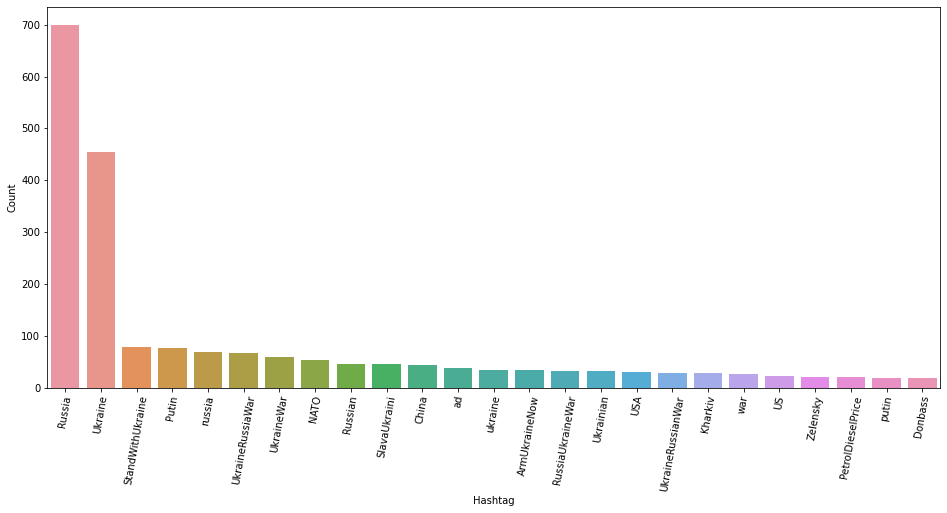

In [29]:
generate_hashtag_freqdist(hashtags)

In [30]:
# Preprocessing functions
"""
Removing ‘@names’,links (http | https),Punctuations, Numbers and Special characters. Because they don't convey any sentiment of the text

"""

emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)

# Basic function to clean the text
def clean_tweet(text):
    text = str(text)
    # Remove emojis
    text = emoji_pattern.sub(r'', text)
    # Remove identifications
    text = re.sub(r'@\w+', '', text)
    # Remove links
    text = re.sub(r'http.?://[^/s]+[/s]?', '', text)
    return text.strip().lower()

    
def analyze_sentiment(tweet):
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [31]:
data2['Sentiment'] = data2['tweet'].apply(lambda x:analyze_sentiment(x))
data2['Source'] = 'random_user'
data2['Length'] = data2['tweet'].apply(len)
data2['Word_counts'] = data2['tweet'].apply(lambda x:len(str(x).split()))

In [32]:
data=data2[['tweet','retweets_count', 'Sentiment', 'Source', 'Length','Word_counts']]
data.head()

,tweet,retweets_count,Sentiment,Source,Length,Word_counts
created_at,,,,,,
2022-05-27 02:48:20+00:00,*Turkish Security Council: the operations of t...,0,-1,random_user,250,40
2022-05-27 02:48:19+00:00,@HaydenHall5 Putin had a strong grip on Russia...,0,-1,random_user,293,52
2022-05-27 02:48:17+00:00,Russia expert lets mask slip as he warns milit...,0,-1,random_user,114,17
2022-05-27 02:48:17+00:00,@Prez215 America is fighting Russia by Proxy,0,0,random_user,44,7
2022-05-27 02:48:17+00:00,@AEHarshada Mam : NMDC - check YOY result ...,0,0,random_user,279,49


In [33]:
pd.options.mode.chained_assignment = None  # default='warn'

In [34]:
data['Clean tweet'] = data['tweet'].apply(lambda x:clean_tweet(x))

In [35]:
data[["Clean tweet","Sentiment"]].iloc[100]

Clean tweet    russia accused of kidnapping own citizens to f...
Sentiment                                                      1
Name: 2022-05-27 02:45:54+00:00, dtype: object

In [36]:
neutral = data[data['Sentiment'] == 0]
positive = data[data['Sentiment'] == 1]
negative = data[data['Sentiment'] == -1]

In [37]:
 !pip install plotly==5.8.2

In [38]:
x = ['Neutral', 'Positive', 'Negative']
y = [len(neutral),  len(positive), len(negative)]

import plotly.graph_objs as go
# Use the hovertext kw argument for hover text
fig = go.Figure(data=[go.Bar(x=x, y=y,
            hovertext=['61% of tweets', '28% of tweets', '11% of tweets'])])

# Customize aspect
#marker_color='rgb(158,202,225)'
fig.update_traces(marker_line_color='midnightblue',
                  marker_line_width=1.)
fig.update_layout(title_text='Distribution of sentiment')
fig.show()



In [39]:
len(data)

10016

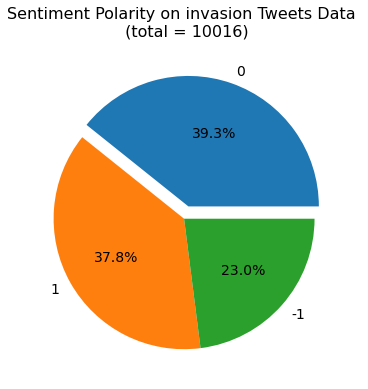

In [40]:
fig, ax = plt.subplots(figsize = (6, 6))
sizes = [count for count in data['Sentiment'].value_counts()]
labels = list(data['Sentiment'].value_counts().index)
explode = (0.1, 0, 0)
ax.pie(x = sizes, labels = labels, autopct = '%1.1f%%', explode = explode, textprops={'fontsize': 14})
ax.set_title('Sentiment Polarity on invasion Tweets Data \n (total = {})'.format(len(data)), fontsize = 16, pad = 20)
plt.show()

In [41]:
len(neutral)

3932

In [42]:
negative.iloc[1]

tweet             @HaydenHall5 Putin had a strong grip on Russia...
retweets_count                                                    0
Sentiment                                                        -1
Source                                                  random_user
Length                                                          293
Word_counts                                                      52
Clean tweet       putin had a strong grip on russia as a bloody ...
Name: 2022-05-27 02:48:19+00:00, dtype: object

In [43]:


#neutral_text
print("Neutral tweet example  :",neutral['tweet'].values[15])
# Positive tweet
print("Positive Tweet example :",positive['tweet'].values[37])
#negative_text
print("Negative Tweet example :",negative['tweet'].values[1])



Neutral tweet example  : and it’s in russia…
Positive Tweet example : He also said: "Russia is fulfilling its international obligations in terms of contracts and, in particular, those related to the export of consumer goods and other much-needed products to Africa."  ¶
Negative Tweet example : @HaydenHall5 Putin had a strong grip on Russia as a bloody dictator for the last 22 years.  Now, as an old man with an ongoing health issue, and international community against his regime, he probably won't have too much time left.  In fact,I wouldn't be surprised if there is a military coup.


In [44]:


x = data.Length.values


fig = go.Figure(data=[go.Histogram(x=x,
                                   marker_line_width=1, 
                                   marker_line_color="midnightblue", 
                                   xbins_size = 5)])

fig.update_layout(title_text='Distribution of tweet lengths')
fig.show()



In [45]:
x1 = neutral.Length.values
x2 = positive.Length.values
x3 = negative.Length.values

fig = go.Figure(data=[go.Histogram(x=x1,
                                   marker_line_width=1, 
                                   marker_line_color="midnightblue", 
                                   xbins_size = 5,
                                   opacity = 0.5)])

fig.update_layout(title_text='Distribution of neutral tweet lengths')
fig.show()

fig = go.Figure(data=[go.Histogram(x=x2,
                                   marker_line_width=1, 
                                   marker_color='rgb(50,202,50)', 
                                   marker_line_color="midnightblue", 
                                   xbins_size = 5,
                                   opacity = 0.5)])

fig.update_layout(title_text='Distribution of positive tweet lengths')
fig.show()

fig = go.Figure(data=[go.Histogram(x=x3,
                                   marker_line_width=1, 
                                   marker_color='crimson', 
                                   marker_line_color="midnightblue", 
                                   opacity = 0.5)])

fig.update_layout(title_text='Distribution of negative tweet lengths')
fig.show()



In [46]:
y1 = neutral.Length.values
y2 = positive.Length.values
y3 = negative.Length.values

fig = go.Figure()

fig.add_trace(go.Box(y=y1, 
                     name="Neutral", 
                     marker_line_width=1, 
                     marker_line_color="midnightblue"))

fig.add_trace(go.Box(y=y2, 
                     name="Positive", 
                     marker_line_width=1, 
                     marker_color = 'rgb(50,202,50)'))

fig.add_trace(go.Box(y=y3, 
                     name="Negative", 
                     marker_line_width=1, 
                     marker_color = 'crimson'))

fig.update_layout(title_text="Box Plot tweet lengths")

fig.show()



In [47]:
neutral

,tweet,retweets_count,Sentiment,Source,Length,Word_counts,Clean tweet
created_at,,,,,,,
2022-05-27 02:48:17+00:00,@Prez215 America is fighting Russia by Proxy,0,0,random_user,44,7,america is fighting russia by proxy
2022-05-27 02:48:17+00:00,@AEHarshada Mam : NMDC - check YOY result ...,0,0,random_user,279,49,mam : nmdc - check yoy result eps increas...
2022-05-27 02:48:06+00:00,@0xpyeongyang Russia 🇷🇺,0,0,random_user,23,3,russia
2022-05-27 02:47:55+00:00,FBI Lied: Told Agents Trump-Russia Collusion C...,0,0,random_user,106,13,fbi lied: told agents trump-russia collusion c...
2022-05-27 02:47:51+00:00,Army Gen. Cavoli tells senators that NATO expa...,0,0,random_user,143,20,army gen. cavoli tells senators that nato expa...
...,...,...,...,...,...,...,...
2022-05-26 23:04:05+00:00,"@visegrad24 russian people are passive, becaus...",0,0,random_user,145,24,"russian people are passive, because there is n..."
2022-05-26 23:04:03+00:00,"@MuellerSheWrote @sandibachom On June 28, 2021...",0,0,random_user,269,46,"on june 28, 2021, russia signed into force tha..."
2022-05-26 23:04:03+00:00,Coréia do Sul com a Rússia pelo Korean Air 820...,0,0,random_user,150,30,coréia do sul com a rússia pelo korean air 820...


In [48]:
tokenized_tweet = data['Clean tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

created_at
2022-05-27 02:48:20+00:00    [*turkish, security, council:, the, operations...
2022-05-27 02:48:19+00:00    [putin, had, a, strong, grip, on, russia, as, ...
2022-05-27 02:48:17+00:00    [russia, expert, lets, mask, slip, as, he, war...
2022-05-27 02:48:17+00:00           [america, is, fighting, russia, by, proxy]
2022-05-27 02:48:17+00:00    [mam, :, nmdc, -, check, yoy, result, eps, inc...
Name: Clean tweet, dtype: object

In [49]:


from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweet.head()



created_at
2022-05-27 02:48:20+00:00    [*turkish, secur, council:, the, oper, of, the...
2022-05-27 02:48:19+00:00    [putin, had, a, strong, grip, on, russia, as, ...
2022-05-27 02:48:17+00:00    [russia, expert, let, mask, slip, as, he, warn...
2022-05-27 02:48:17+00:00              [america, is, fight, russia, by, proxi]
2022-05-27 02:48:17+00:00    [mam, :, nmdc, -, check, yoy, result, ep, incr...
Name: Clean tweet, dtype: object

In [150]:
!pip install tweepy

In [151]:
!pip install pycountry

In [152]:
!pip install langdetect

In [50]:
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

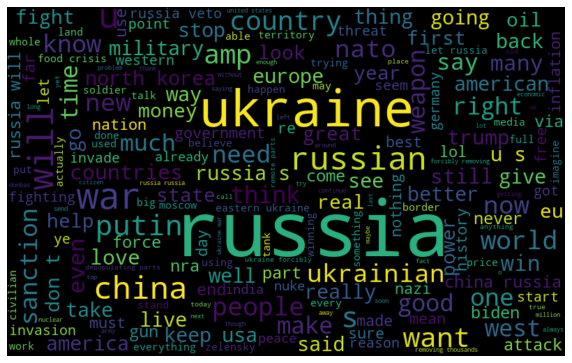

In [51]:
positive_words =' '.join([text for text in data['Clean tweet'][data['Sentiment'] == 1]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(positive_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()



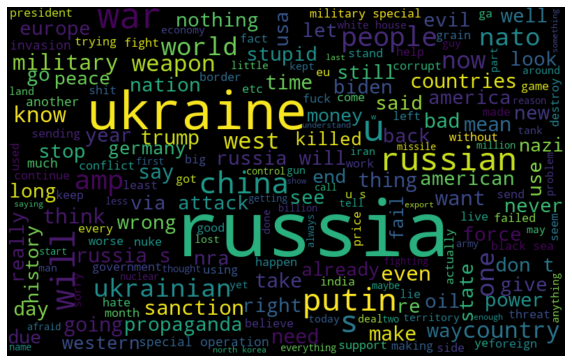

In [52]:
negative_words =' '.join([text for text in data['Clean tweet'][data['Sentiment'] == -1]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

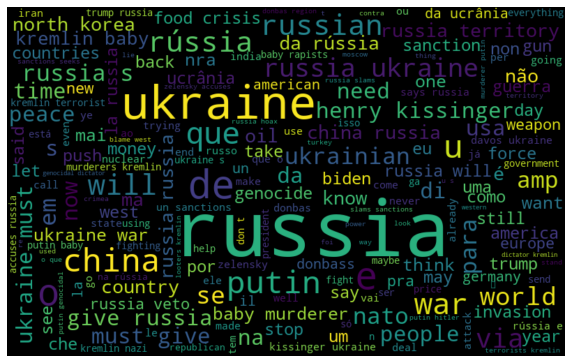

In [53]:
neutral_words =' '.join([text for text in data['Clean tweet'][data['Sentiment'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(neutral_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [54]:
# function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [55]:
HT = hashtag_extract(data['tweet'])
HT = sum(HT,[])

In [56]:
size = [count for count in data['Sentiment'].value_counts()]
name= list(data['Sentiment'].value_counts().index)

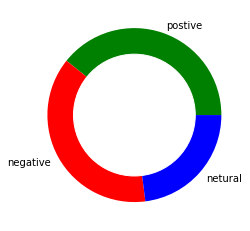

In [57]:
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=['postive','negative','netural'], colors=['green','red','blue'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

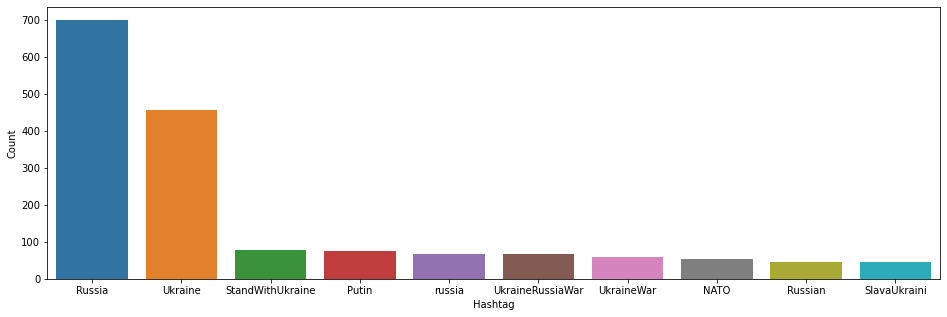

In [58]:
a = nltk.FreqDist(HT)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()